<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/DrugPrediction_UsingPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drug Prediction**

# **1. Introduction**


**Your client for this project is a pharmaceutical company.**


*  They have a long history of making effective drugs and are the leading producer of antibiotics for bacterial infection.
*  Their **research and development** team have recently developed **five types** of drugs to fight against **chronic throat infection**
*   They want to quickly release the drug in the market so that they could **cure** **people** and increase **revenue** for the company.
*   The drug which has a **higher concentration** of chemicals should be given to those groups of people whose** health report** passes some **criteria** as suggested by the R&D team.

**Current Scenario:**

* The R&D group has invited some groups of people to test the drug, but going through each person’s health report might take a lot of time and cause a **delay** in launching the drug in the market.



# **2. Problem Statement**
**The current process suffers from the following problems:**

*   Testing phase takes a lot of time and it's done manually because they need to carefully examine each person for the side effects.
*   Most of the crucial time is being wasted in checking each person’s health report and dispensing specific drugs according to the health metric as suggested by the R&D team.

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

**Your Role**
*   You are given a dataset containing the health report of the people from the test group.
*   Your task is to build a multi-class classification model using the dataset.
*   Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


# **3. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler
# import sklearn.linear_model.LogisticRegression as LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,classification_report
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings(action="ignore")

# **4. Data Acquisition & Description**

In [2]:
data=pd.read_csv("/content/drive/MyDrive/TermProjects/DrugPrediction/drug_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/TermProjects/DrugPrediction/drug_test.csv")
data.head()


,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [4]:
data.describe()

,Id,Age,Na_to_K
count,160.000000,160.000000,160.000000
mean,99.075000,45.387500,16.194988
std,59.374894,16.101481,7.254689
min,0.000000,15.000000,6.269000
25%,45.500000,32.000000,10.445250
50%,100.500000,46.000000,14.076500
75%,149.500000,58.250000,19.480750
max,199.000000,74.000000,38.247000


# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [5]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html',)
# print('Accomplished!')

**Check null value or any other inconsistent value in column**

In [6]:
print((data=="").sum(), "\n")

Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64 



In [7]:
print(data.isna().sum(), "\n")


Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64 



In [8]:
print((data=="Unknown").sum(), "\n")


Id             0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64 



In [9]:
print((data==0).sum(), "\n")

Id             1
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64 



In [10]:
data.duplicated().any()

False

In [11]:
catCol=["Sex","BP","Cholesterol","Drug"]
for col in catCol:
  print(data[col].value_counts())



M    83
F    77
Name: Sex, dtype: int64
HIGH      62
NORMAL    51
LOW       47
Name: BP, dtype: int64
HIGH      88
NORMAL    72
Name: Cholesterol, dtype: int64
DrugY    76
drugX    43
drugA    17
drugB    13
drugC    11
Name: Drug, dtype: int64


**Check distribution of numerical features and Outliers**

outliers in feature Age are
 Series([], Name: Age, dtype: int64)
outliers in feature Na_to_K are
 3      33.486
17     35.639
19     38.247
55     34.686
86     37.188
153    34.997
Name: Na_to_K, dtype: float64


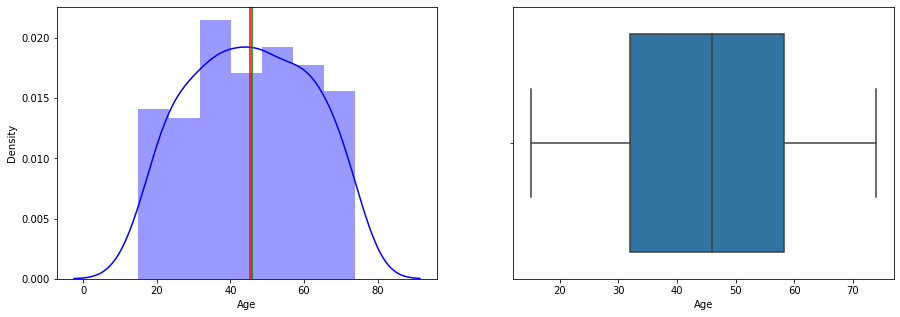

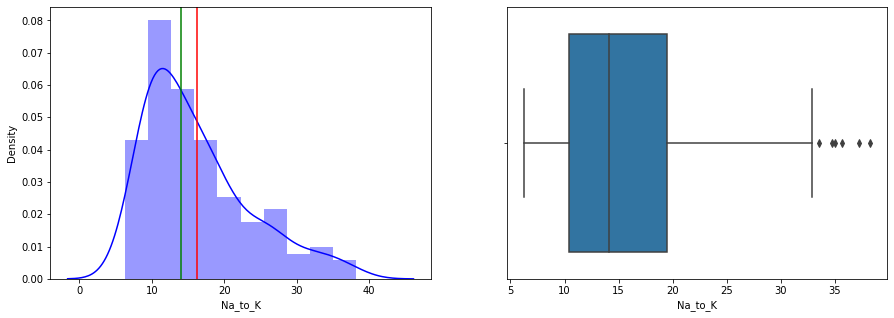

In [12]:
contColumn=["Age","Na_to_K"]

for col in contColumn:  
  fig=plt.figure(figsize=[15,5])
  plt.subplot(1,2,1)
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")
  plt.subplot(1,2,2)
  sns.boxplot(data[col])
  quamtile_75=data[col].quantile(q=.75)
  quamtile_25=data[col].quantile(q=.25)
  iqr=quamtile_75-quamtile_25
  lower_limit=quamtile_25-1.5*iqr
  upper_limit=quamtile_75+1.5*iqr
  outliers=data[col][(data[col]<lower_limit )|(data[col]>upper_limit)]
  print("outliers in feature", col ,"are\n" ,outliers)
  # data.drop(index=outliers.index, inplace=True)

  

### **5.2 Data Cleaning**

- N/A

In [13]:
# Drug: Contains 5 classes of drugs encoded as(drug A : 3, drug B: 4, drug C: 2, drug X: 0, drug Y: 1)
data.Drug=data.Drug.replace(["drugA","drugB","drugC","drugX","DrugY"],[3,4,2,0,1])

data.Drug.value_counts()

1    76
0    43
3    17
4    13
2    11
Name: Drug, dtype: int64

### **5.3 Data Post-Profiling**

- Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

# **6. Exploratory Data Analysis**

### **Check the frequency of catrgorical features**

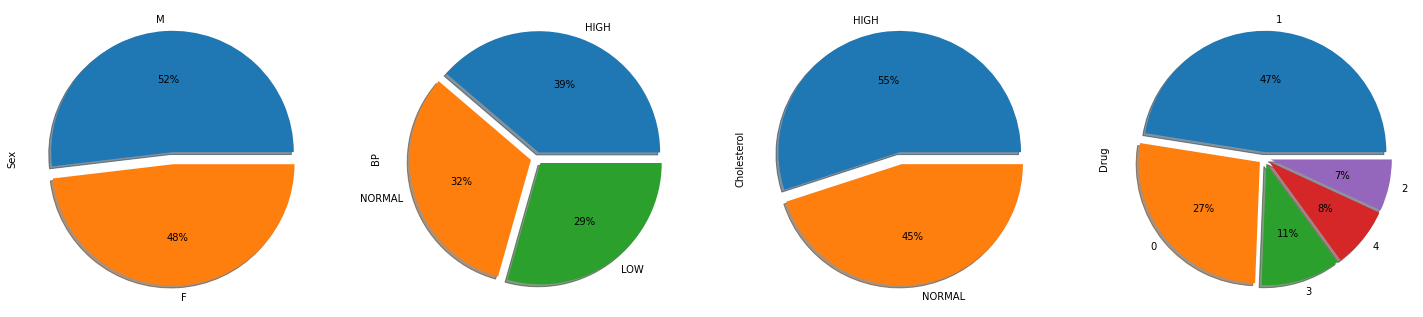

In [14]:
CatColumn=["Sex","BP","Cholesterol","Drug"]
fig=plt.figure(figsize=[25,10])

for col in CatColumn:  
  plt.subplot(1,len(CatColumn),(CatColumn.index(col))+1)
  space = np.ones(data[col].nunique())/20
  data[col].value_counts().plot(kind='pie', explode=space, autopct='%1.0f%%',shadow = True)


### **Analize Relationship between BP, Cholestrol and Drug**

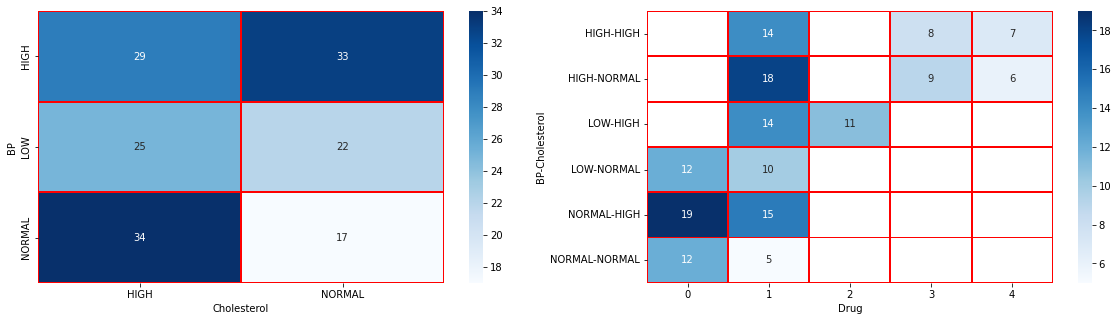

In [15]:
fig=plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
data1=data.groupby(["BP","Cholesterol"])["Id"].count().unstack()
sns.heatmap(data1,annot=True,cmap="Blues",linecolor='Red',linewidth=1)
plt.subplot(1,2,2)
data1=data.groupby(["BP","Cholesterol","Drug"])["Drug"].count().unstack()
sns.heatmap(data1,annot=True,cmap="Blues",linecolor='Red',linewidth=1)

### **Analize Relationship between Age, Na_to_K and Drug**

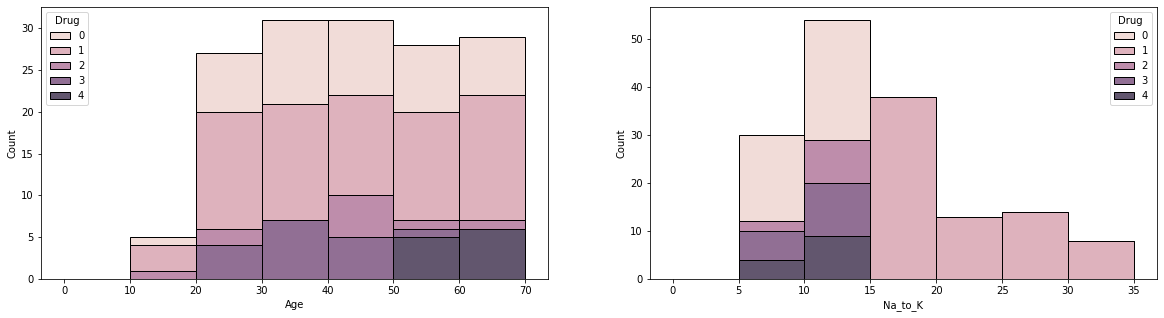

In [16]:
fig=plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.histplot(data=data,x="Age",bins=np.arange(0,80,10),hue="Drug",multiple="stack",stat="count")
plt.subplot(1,2,2)
sns.histplot(data=data,x="Na_to_K",bins=np.arange(0,40,5),hue="Drug",multiple="stack",stat="count")


### **Correlation Matrix**

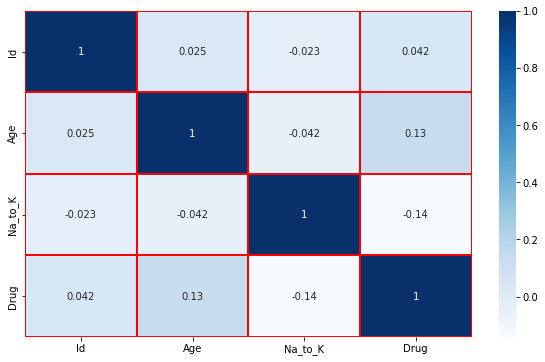

In [17]:
figure=plt.figure(figsize=[10,6])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor='Red',linewidth=1)

## **Check Data Imbalance**

In [18]:
data.Drug.value_counts()

1    76
0    43
3    17
4    13
2    11
Name: Drug, dtype: int64

# **7. Data Post-Processing**

### **7.1 Data Preparation / Train Test Split**



In [19]:
#**Remove Irrelavent Features**

data=data.drop(["Id"], axis=1)
dataValidationId=dataValidation.Id
dataValidation=dataValidation.drop(["Id"], axis=1)
X=data.drop("Drug",axis=1)
y=data.Drug



# **8. Model Development & Evaluation**

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline

# Define which columns should be encoded
columns_to_encode=["Sex","BP","Cholesterol"]

# Instantiate column transformer
column_trans=make_column_transformer((OneHotEncoder(drop="first"),columns_to_encode),remainder="passthrough")

# Instantiate Decision Tree Model
modelDT=DecisionTreeClassifier()
# Make Pipeline
pipe=make_pipeline(column_trans,modelDT)

cv_score=cross_validate(pipe,X,y,cv=5,n_jobs=-1,scoring="accuracy",return_train_score=True)
cv_score_df=pd.DataFrame(cv_score)
print(cv_score_df)
print(cv_score_df.mean())

pipe.fit(X,y)
dataValidation_pred=pipe.predict(dataValidation)

submission = pd.DataFrame({'Id':dataValidationId,'Drug':dataValidation_pred})
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')





   fit_time  score_time  test_score  train_score
0  0.019953    0.004923     1.00000          1.0
1  0.011231    0.005493     1.00000          1.0
2  0.016320    0.016455     1.00000          1.0
3  0.015962    0.011636     0.96875          1.0
4  0.015538    0.009887     1.00000          1.0
fit_time       0.015801
score_time     0.009679
test_score     0.993750
train_score    1.000000
dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>